In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [7]:
DavidsonCountyBorder = gpd.read_file('C:/NSS_Data_Analytics/Projects/geospatial-python-workshop-HTMIV/data/Davidson County Border.geojson')
print(DavidsonCountyBorder.crs)
DavidsonCountyBorder.head( )

EPSG:4326


,area_sq_mi,objectid,shape_area,shape_len,geometry
0,525,4,14641027913.6,686109.334953,"MULTIPOLYGON (((-86.52704 36.13598, -86.52914 ..."
1,0,3,675823.52,3786.70930403,"MULTIPOLYGON (((-86.52315 36.13876, -86.52288 ..."


In [8]:
type(DavidsonCountyBorder)

geopandas.geodataframe.GeoDataFrame

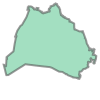

In [9]:
DavidsonCountyBorder.loc[0, 'geometry']

In [10]:
print(DavidsonCountyBorder.loc[0, 'geometry'])

MULTIPOLYGON (((-86.52703726692877 36.13597654687297, -86.52913545328485 36.13628517923899, -86.52927757115833 36.136306082415594, -86.52927684476565 36.13483582899241, -86.53032196072225 36.132624879419474, -86.53056991038623 36.132087998255706, -86.5321491550914 36.13214234708685, -86.53177011997343 36.130716498396886, -86.53176435559672 36.13069481522987, -86.53119444292042 36.12855082564326, -86.53351897171612 36.12722216567062, -86.53371591943538 36.12710262174399, -86.53510529804487 36.12625476919773, -86.53521694726722 36.12618663509819, -86.53345768871225 36.12514739140093, -86.5322689301621 36.12446946510383, -86.53220835765786 36.124434230090046, -86.53168043682776 36.12412713479486, -86.52993853486339 36.12419469634741, -86.5291106256508 36.124226798641814, -86.52909970416276 36.12422391806914, -86.52948744132286 36.12164032968466, -86.52985180247538 36.1192103300137, -86.5300151226289 36.118112986219586, -86.53014734484897 36.11722675284271, -86.53022251634451 36.1167209631

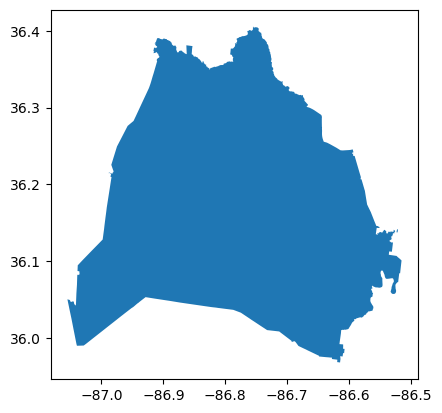

In [11]:
DavidsonCountyBorder.plot();

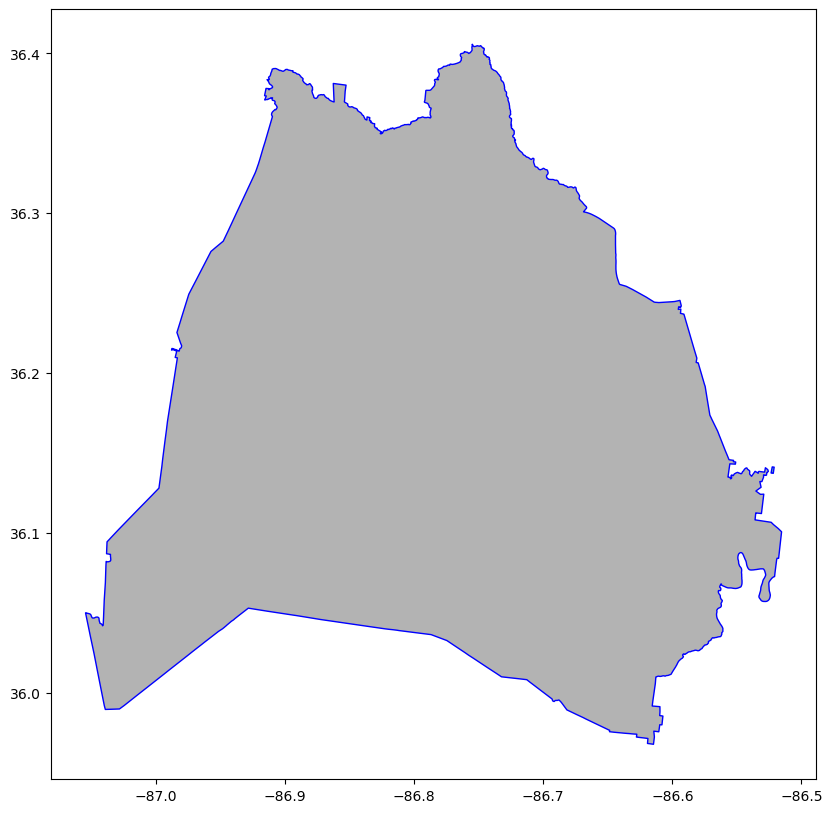

In [16]:
#geopandas will take care of legend styling if you pass a dict of keywords

#leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
#            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

DavidsonCountyBorder.plot(column = 'area_sq_mi', figsize=(10, 10),
              edgecolor = 'blue',
              #legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [17]:
HistMarker = pd.read_csv('../data/Historical_Markers_20231216.csv')
print(HistMarker.shape)
HistMarker.head(3)

(255, 9)


,Number,Year Erected,Marker Name,Marker Text,Civil War Site?,Location,Latitude,Longitude,Mapped Location
0,120,2005,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",NaN,"Hume-Fogg High School, 700 Broadway",36.159303,-86.781572,POINT (-86.781572 36.159303)
1,78,1982,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,NaN,Belle Meade Boulevard at Warner Park entrance,36.083058,-86.867129,POINT (-86.867129 36.083058)
2,94,1995,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",NaN,Union Street and Capitol Boulevard,36.163758,-86.782870,POINT (-86.78287 36.163758)


In [18]:
HistMarker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           255 non-null    int64  
 1   Year Erected     255 non-null    int64  
 2   Marker Name      255 non-null    object 
 3   Marker Text      255 non-null    object 
 4   Civil War Site?  12 non-null     object 
 5   Location         252 non-null    object 
 6   Latitude         245 non-null    float64
 7   Longitude        245 non-null    float64
 8   Mapped Location  244 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.1+ KB


In [24]:
HistArea = gpd.GeoDataFrame(HistMarker, 
                           crs = DavidsonCountyBorder.crs, 
                           geometry = gpd.points_from_xy(HistMarker.Longitude, HistMarker.Latitude))

In [27]:
type(HistArea)

geopandas.geodataframe.GeoDataFrame

In [28]:
HistoricMarker= gpd.sjoin(HistArea, DavidsonCountyBorder, predicate = 'within')

In [48]:
HistoricMarker.head(20)

,Number,Year Erected,Marker Name,Marker Text,Civil War Site?,Location,Latitude,Longitude,Mapped Location,geometry,index_right,area_sq_mi,objectid,shape_area,shape_len
0,120,2005,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",NaN,"Hume-Fogg High School, 700 Broadway",36.159303,-86.781572,POINT (-86.781572 36.159303),POINT (-86.78157 36.15930),0,525,4,14641027913.6,686109.334953
1,78,1982,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,NaN,Belle Meade Boulevard at Warner Park entrance,36.083058,-86.867129,POINT (-86.867129 36.083058),POINT (-86.86713 36.08306),0,525,4,14641027913.6,686109.334953
2,94,1995,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",NaN,Union Street and Capitol Boulevard,36.163758,-86.782870,POINT (-86.78287 36.163758),POINT (-86.78287 36.16376),0,525,4,14641027913.6,686109.334953
3,215,2020,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",NaN,Lock 2 Road,36.244216,-86.701920,POINT (-86.70192 36.244216),POINT (-86.70192 36.24422),0,525,4,14641027913.6,686109.334953
4,127,2008,Una Community,The Una community developed around the crossro...,NaN,Smith Springs Road and Old Murfreesboro Road,36.096776,-86.654516,POINT (-86.654516 36.096776),POINT (-86.65452 36.09678),0,525,4,14641027913.6,686109.334953
5,209,2019,Olive Branch Missionary Baptist Church,"In 1871, District 6 school commissioners John ...",NaN,5988 Cane Ridge Road,36.005319,-86.639733,POINT (-86.639733 36.005319),POINT (-86.63973 36.00532),0,525,4,14641027913.6,686109.334953
6,148,2013,W.r. Rochelle (1904-1989),"A graduate of Peabody College, William Rayburn...",NaN,"Cohn School, 4805 Park Avenue",36.150993,-86.845250,POINT (-86.84525 36.150993),POINT (-86.84525 36.15099),0,525,4,14641027913.6,686109.334953
7,17,1969,Chickasaw Treaty,"In 1783, Chickasaw chiefs met with white settl...",NaN,Corner of Morrow Road and Terry Drive,36.163513,-86.863273,POINT (-86.863273 36.163513),POINT (-86.86327 36.16351),0,525,4,14641027913.6,686109.334953
8,199,2019,Jewish Community Center Bombing,"At 8:07 p.m. on Sunday, March 16, 1958 a bomb ...",NaN,440 Greenway entrance at West End Avenue,36.136352,-86.822402,POINT (-86.822402 36.136352),POINT (-86.82240 36.13635),0,525,4,14641027913.6,686109.334953
9,161,2017,Penny Campbell 1953-2014,An activist for LGBT rights and advocate for p...,NaN,1615 McEwen Avenue,36.181223,-86.739831,POINT (-86.739831 36.181223),POINT (-86.73983 36.18122),0,525,4,14641027913.6,686109.334953


In [46]:
HistMarkerName = HistoricMarker.loc[HistoricMarker['Year Erected'].between(2010,2019)]
HistMarkerName.shape

(80, 15)

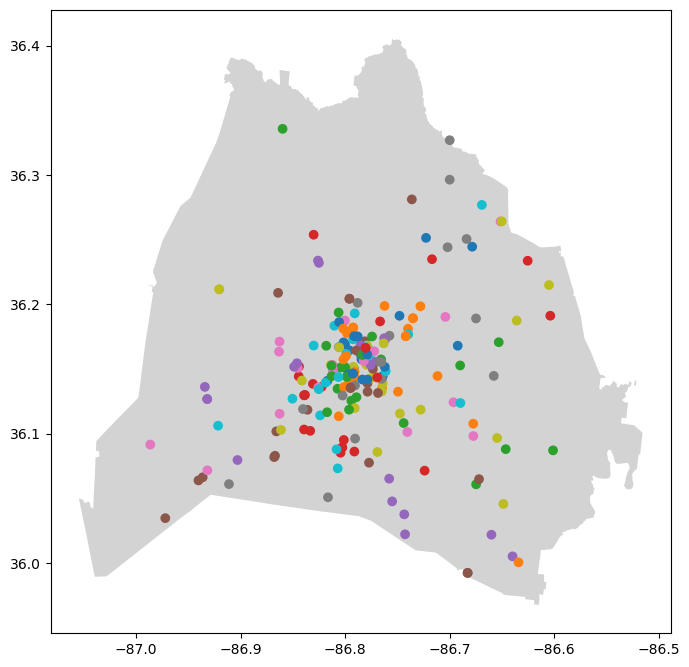

In [50]:
ax = DavidsonCountyBorder.plot(figsize = (8, 10), color = 'lightgray')
HistoricMarker.plot( ax = ax, column = 'Location');
plt.show();

In [63]:
DavidsonCountyBorder.geometry.centroid

C:\Users\hercu\AppData\Local\Temp\ipykernel_31388\2858849610.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  DavidsonCountyBorder.geometry.centroid


0    POINT (-86.78493 36.16952)
1    POINT (-86.52221 36.13925)
dtype: geometry

In [64]:
center = DavidsonCountyBorder.geometry.centroid[0]
print(center)

POINT (-86.78492656233847 36.169518278335836)


C:\Users\hercu\AppData\Local\Temp\ipykernel_31388\1492963041.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = DavidsonCountyBorder.geometry.centroid[0]


In [65]:
area_center = [center.y, center.x]
# check the order of area_center, the location for our folium map
print(area_center)

[36.169518278335836, -86.78492656233847]


In [87]:
MapMarker = folium.Map(location =  area_center, zoom_start = 12)
MapMarker

In [88]:
i = 0
for row_index, row_values in HistMarkerName.iterrows():
    if i < 1 : 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i = i

index is 5
values are:
 
Number                                                           209
Year Erected                                                    2019
Marker Name                   Olive Branch Missionary Baptist Church
Marker Text        In 1871, District 6 school commissioners John ...
Civil War Site?                                                  NaN
Location                                        5988 Cane Ridge Road
Latitude                                                   36.005319
Longitude                                                 -86.639733
Mapped Location                         POINT (-86.639733 36.005319)
geometry                                POINT (-86.639733 36.005319)
index_right                                                        0
area_sq_mi                                                       525
objectid                                                           4
shape_area                                             14641027913.6
shape_len

In [93]:
Map2000To2019 = folium.Map(location =  area_center, zoom_start =10)

folium.GeoJson(DavidsonCountyBorder).add_to(Map2000To2019)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in HistMarkerName.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Marker Name'].upper())
    icon=folium.Icon(color="blue",icon="fa-map-marker", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(Map2000To2019)
Map2000To2019.save('../maps/Map2000To2019.html')

#display our map
Map2000To2019

In [90]:
cluster_map = folium.Map(location =  area_center, zoom_start = 10)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map)

folium.GeoJson(DavidsonCountyBorder).add_to(cluster_map)

# inside the loop add each marker to the cluster
for row_index, row_values in HistMarkerName.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Marker Name'])
    icon=folium.Icon(color="blue",icon="fa-map-marker", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map.save('../maps/clustermap.html')

cluster_map 

In [92]:
maps = folium.Map(location =  area_center, zoom_start = 10)

folium.GeoJson(DavidsonCountyBorder).add_to(maps)

#create a list of locations and pass them to FastMarkerCluster()
locations = HistMarkerName[['Latitude', 'Longitude']].values.tolist()
maps.add_child(
    FastMarkerCluster(locations)
)

#display our map
maps